# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [72]:
# !pip install folium

In [73]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [75]:
df = pd.read_csv('/Users/vsevolodparamonov/Downloads/train.csv')
df.head(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [76]:
df.drop('dropoff_datetime', axis=1, inplace=True)
df.pickup_datetime = df.pickup_datetime.astype('datetime64[ns]')

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

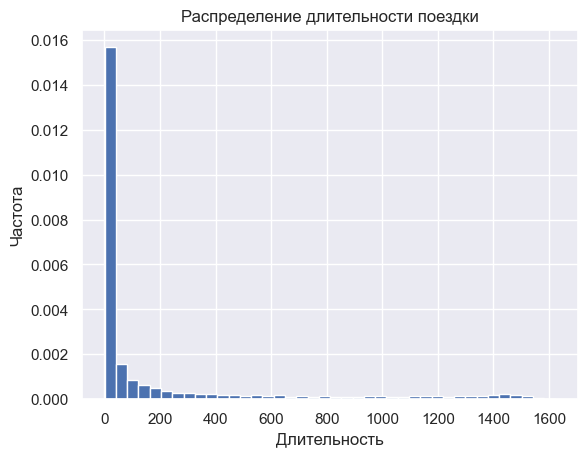

In [77]:
plt.hist(df.trip_duration.value_counts(), bins=40, density=True)
plt.title('Распределение длительности поездки')
plt.xlabel('Длительность')
plt.ylabel('Частота');

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

#### <div style='color:red'>Ответ: </div>Наибольшее количество поездок имеют маленькую длительность поездки

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

#### <div style='color:red'>Ответ: </div>

#### Потому что RMSLE учитывает только относительную ошибку между прогнозом и фактом и абсолютный размер не важен для этого функционала. К тому же в RMSLE больший штраф дается за недопрогноз, чем перепрогноз, что, как мне кажется лучше конкретно для этой задачи, потому что лучше предсказывать время с запасом. 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

> #### <div style='color:red'>**Доказательство**: </div>
>
> #### Для начала докажем, что оптимизация RMSLE совпадает с оптимизацией RMSE
>
> $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$
>
> $$ \text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(y_i - a(x_i))^2 } $$
>
> #### Рассмотрим отдельно функционал $ RMSLE $. 
>
> $$ L_1(y, \hat{y}) = \sqrt{(\log(y + 1) - \log(\hat{y} + 1))^2} = | (\log(y + 1) - \log(\hat{y} + 1)) | $$
>
> #### Так как мы рассматриваем длительность поездки, то $ y > 0, \hat{y} > 0 $. Логарифмическая функция монотонно возрастает с увеличением аргументов (т.к. аргументы положительны). Тогда если $ y > \hat{y} $, то $ L_1(y, \hat{y}) > 0 $, аналогично и для $ y < \hat{y} $. Тогда минимум функции $ L_1(y, \hat{y}) $ достигается при $ y = \hat{y} $
>
> #### По аналогии рассмотрим функционал $ RMSE $:
>
> $$ L_2(y, \hat{y}) = \sqrt{(y - \hat{y}) ^ 2} = | y - \hat{y} | $$
>
>#### Аналогично, минимум $ L_2(y, \hat{y}) $ достигается при $ y = \hat{y} $
>
>#### Теперь рассматривая функцию ошибок можно прийти к выводу, что ее минимум достигается только в том случае, когда все слагаемые функции достигают своего минимума, т.е. $ y_i = \hat{y_i}, i \isin \{1, l \} $
>
>#### Из этих двух пунктов можно сделать вывод, что оптимизация $ RMSLE $ и $ RMSE $ совпадает. Так как $ RMSE^2 = MSE $, а как известно возведение в квадрат - монотонное преобразование и точки минимумов $ RMSE $ и $ MSE $ совпадают, следовательно, можно сделать вывод, что оптимизация $ RMSLE $ эквивалентна оптимизации $ MSE $ 




Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

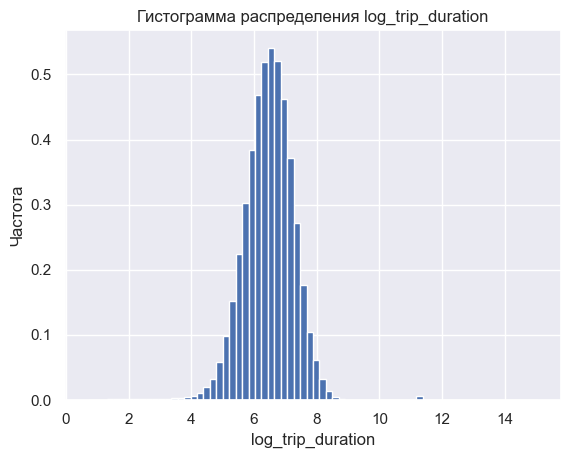

In [78]:
df.loc[:, 'log_trip_duration'] = np.log1p(df.trip_duration)
df.drop('trip_duration', axis=1, inplace=True)
plt.hist(df.log_trip_duration, bins=70, density=True)
plt.xlabel('log_trip_duration')
plt.ylabel('Частота')
plt.title('Гистограмма распределения log_trip_duration');


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

>#### `Наилучшее константное предсказание` - среднее по таргету, поэтому создадим вектор $ x $
>
>- #### $x$ - вектор из средних значений таргета, $ x = \begin{bmatrix} \overline{y} \\ ... \\ \overline{y} \end{bmatrix}$
>
>- #### $y$ - вектор из логарифмов таргета, $ y = \begin{bmatrix} y_1 \\ ... \\ y_n \end{bmatrix}$
>
>- #### $e$ - вектор остатков, $ e = y - x = \begin{bmatrix} y_1 - \overline{y} \\ ... \\ y_n - \overline{y} \end{bmatrix}$
>
>#### Исходя из этого задача расчета RMSLE выглядит следующим образом: 
>
>$$\text{RMSLE} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (x-y)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} e^2} $$
>
>#### $$ \text{где y = } \log{(y_i + 1)}, $$  
>
>####  $$\text{x = } \log{(a(x_i) + 1)}$$ 
>
>#### В векторном виде RMSLE будет выглядеть следующим образом:
>
>$$ RMSLE = \sqrt{\frac{1}{l} e e^{T}} $$


In [79]:
def rmsle(log1p_y_true, log1p_y_pred): 
    
    vec1 = np.array(log1p_y_true)
    vec2 = np.array(log1p_y_pred)

    err = vec1 - vec2

    cnt = np.dot(err, err.T)[0][0]/len(vec1)

    cnt = np.sqrt(cnt)

    return cnt


x = np.full((1, len(df.log_trip_duration.values)), np.mean(df.log_trip_duration.values))
y = df.log_trip_duration.values

rmsle_best_const = rmsle(y, x)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411524


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

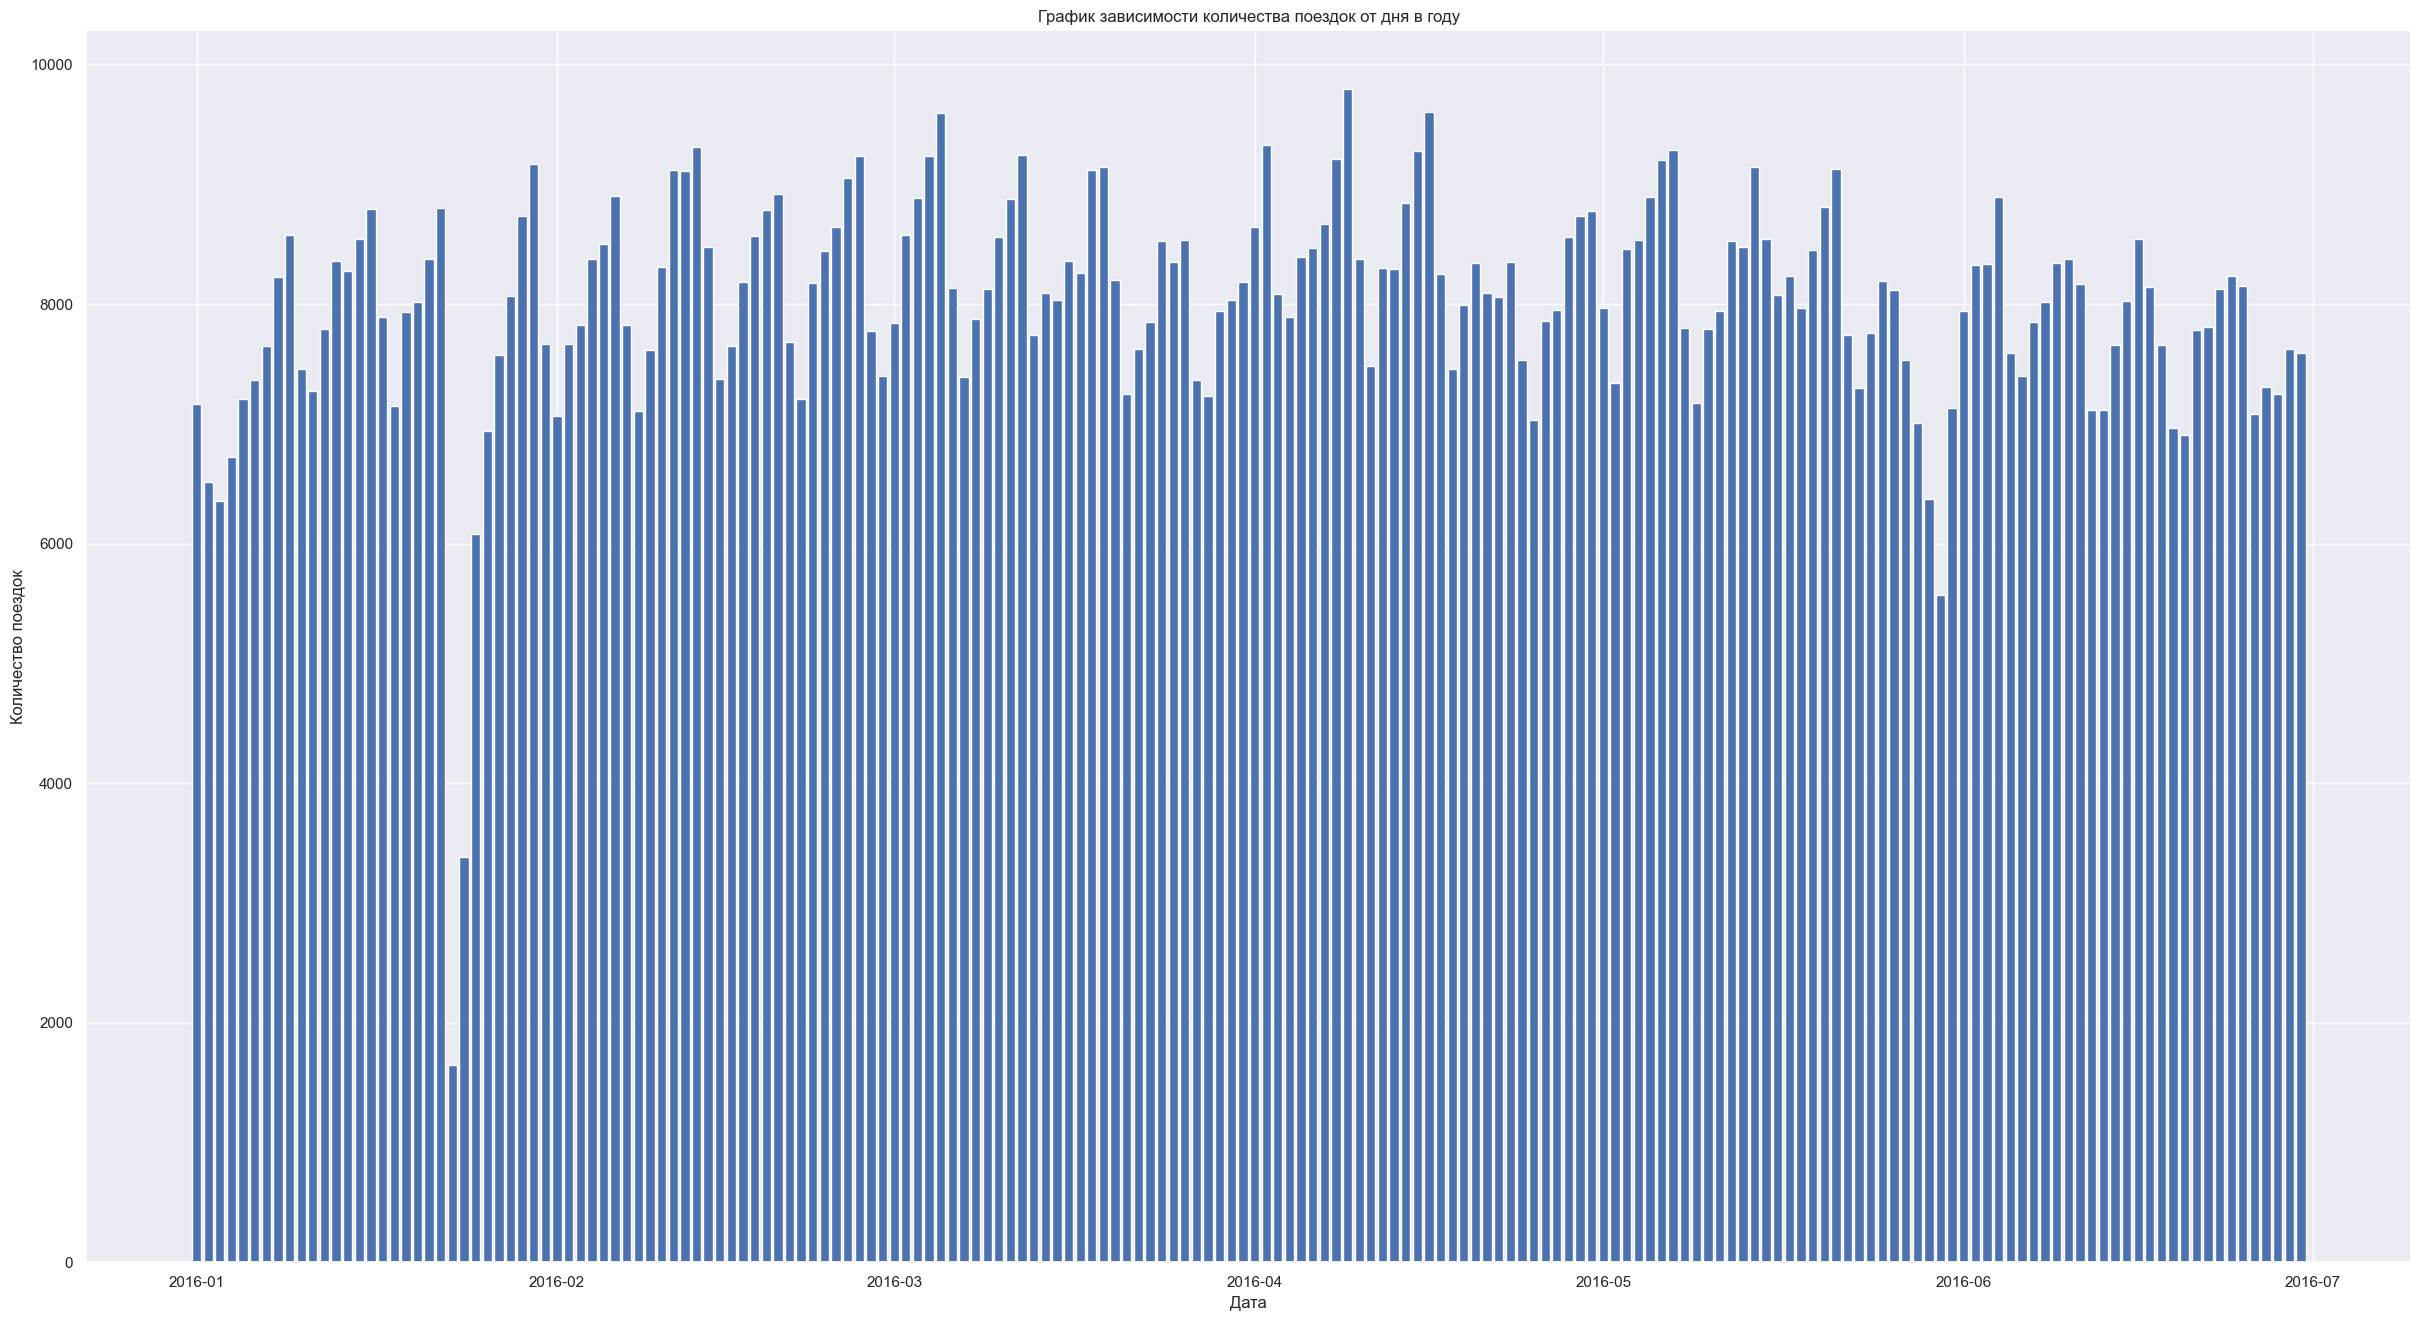

In [80]:
df.loc[:, 'date'] = df.pickup_datetime.dt.date
df.date = df.date.astype('datetime64[ns]')
plt.figure(figsize=(30,16))
plt.bar(df.date.value_counts().index, df.date.value_counts().values)
plt.title('График зависимости количества поездок от дня в году')
plt.xlabel('Дата')
plt.ylabel('Количество поездок');

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.



#### <div style='color:red'> Ответ: </div>

#### На графике отчетливо видно, что присутствую 2 аномальных периода: приблизительно между 2016-01 и 2016-02, значения поездок в этих периодах ниже 4000; приблизительно в конце 2016-05. Определим более точные даты для периода 2016-01 - 2016-02


In [81]:
find_an = pd.DataFrame(df.date.value_counts()).reset_index()
find_an[find_an['count'] < 4000]

date  count
180 2016-01-24   3383
181 2016-01-23   1648

> # _**Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури (23:57 23.01.2016)**_
> #### _Губернатор штата Нью-Йорк Эндрю Куомо запретил автомобильное движение в городе Нью-Йорк из-за снежной бури "Джонас", которая накрыла мегаполис в субботу. Запрет вступает в силу в 14.30 по местному времени (22.30 мск) и продлится до тех пор, пока погода не наладится. Власти опасаются, что после бури город и штат может ждать наводнение, поскольку уже с воскресенья ожидается плюсовая температура._
> [ссылка на источник](https://ria.ru/20160123/1364032228.html)



#### Определим точные даты для периода 2016-05 - 2016-06

In [82]:
find_an = pd.DataFrame(df.date.value_counts()).reset_index()
find_an[(find_an.date.dt.month >= 5) & (find_an.date.dt.month <= 6)].sort_values('count').head(2)

date  count
179 2016-05-30   5570
176 2016-05-29   6372

> # _**День поминовения в Нью-Йорке**_
> #### _В этот день жители Нью-Йорка празднуют неофициальное начало лета, поэтому по городу открывают пляжи. На Губернаторском острове проводят замечательный открытый фестиваль с живой музыкой, развлечениями для детей и многим другим._
> [ссылка на источник](https://www.newyorkcity.ru/день-поминовения-в-нью-йорке/)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

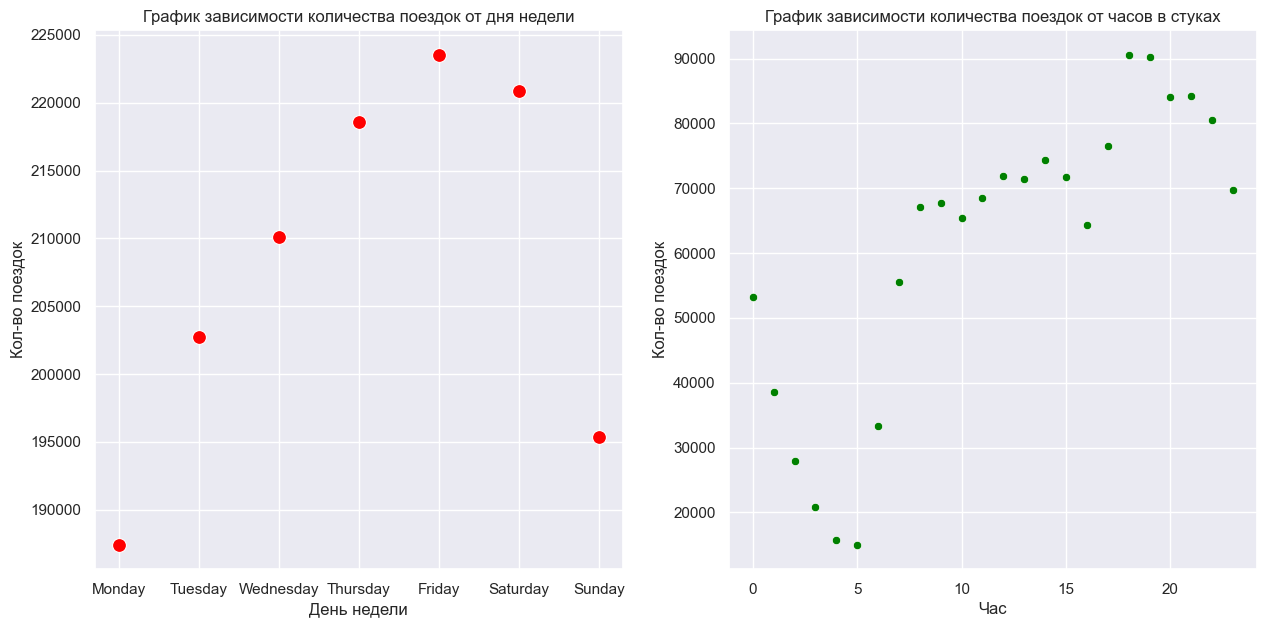

In [83]:
df.loc[:, 'weekday'] = df.pickup_datetime.dt.day_name()
df.loc[:, 'hour'] = df.pickup_datetime.dt.hour

f, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.scatterplot(df.weekday.value_counts().reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']), ax=axs[0], s=100, color='red')
sns.scatterplot(df.hour.value_counts(), ax=axs[1], color='green')

axs[0].set_title('График зависимости количества поездок от дня недели')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Кол-во поездок')

axs[1].set_title('График зависимости количества поездок от часов в стуках')
axs[1].set_xlabel('Час')
axs[1].set_ylabel('Кол-во поездок');


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

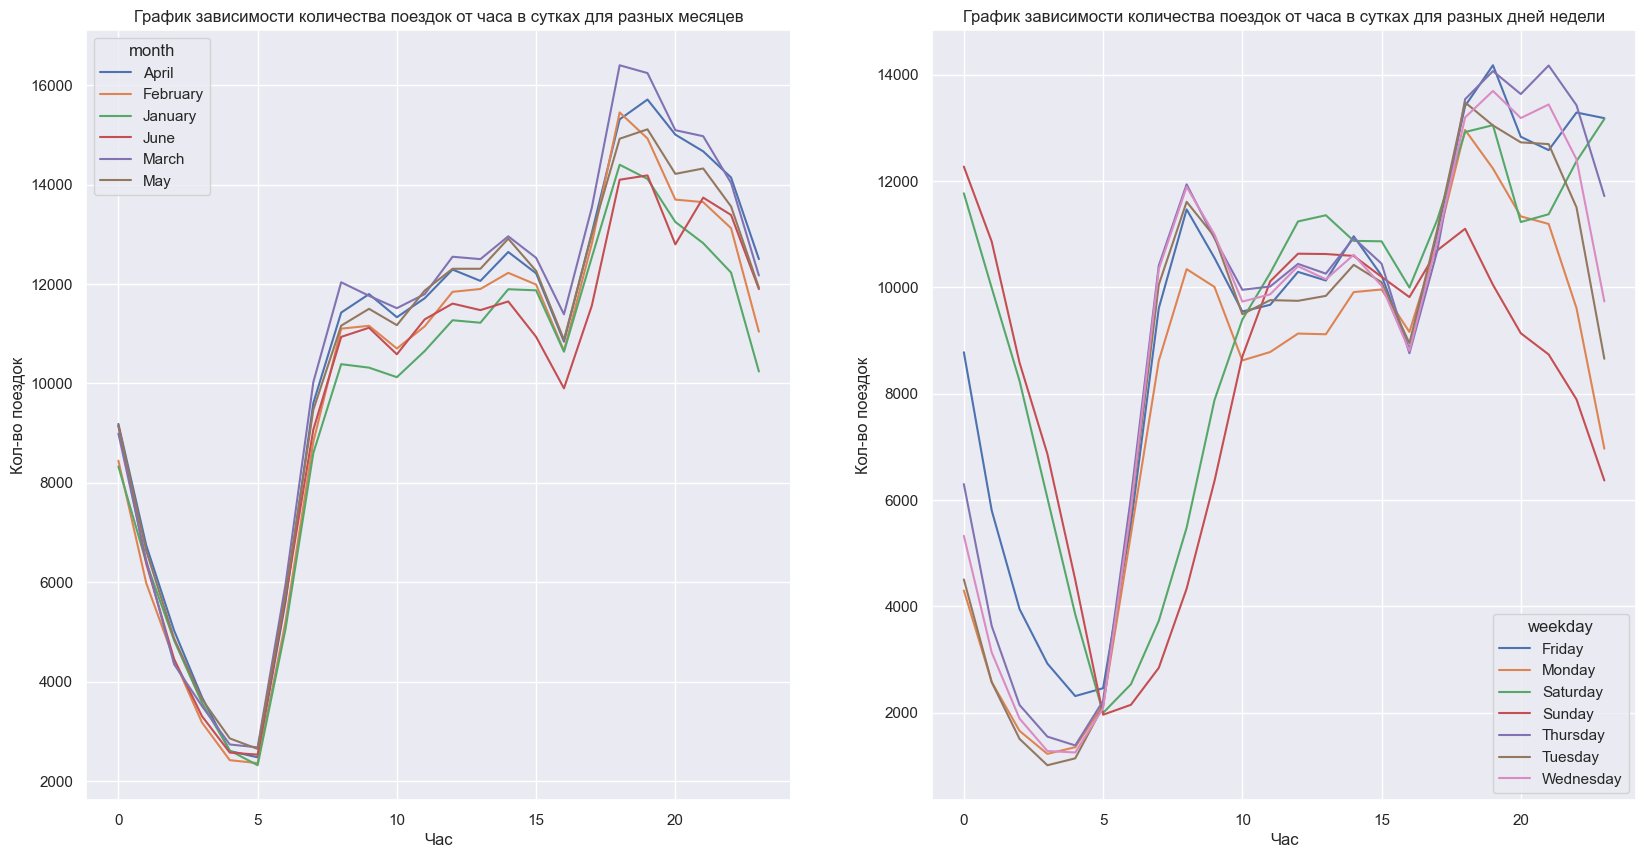

In [84]:
df.loc[:,'month'] = df.pickup_datetime.dt.month_name()

df_perm_1 = df.sort_values(['month', 'hour']).groupby(['month', 'hour']).count().reset_index()
df_perm_1 = df_perm_1[['month', 'hour', 'id']].rename(columns={'id':'cnt'})

df_perm_2 = df.sort_values(['weekday', 'hour']).groupby(['weekday','hour']).count().reset_index()
df_perm_2 = df_perm_2[['weekday', 'hour', 'id']].rename(columns={'id':'cnt'})


f, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.lineplot(df_perm_1, x='hour', y='cnt', hue='month', ax=axs[0])
sns.lineplot(df_perm_2, x='hour', y='cnt', hue='weekday', ax=axs[1])

axs[0].set_title('График зависимости количества поездок от часа в сутках для разных месяцев')
axs[0].set_xlabel('Час')
axs[0].set_ylabel('Кол-во поездок')

axs[1].set_title('График зависимости количества поездок от часа в сутках для разных дней недели')
axs[1].set_xlabel('Час')
axs[1].set_ylabel('Кол-во поездок');



**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


#### <div style='color:red'> Ответ: </div>

- #### Основываясь на графики можно увидеть, что наибольшее кол-во поездок совершается в вечернее время. Это объясняется тем, что люди возвращаются с работы и заказывают такси. Также из [новостей](https://www.newyorkcity.ru/такси-в-нью-йорке/) можно узнать, что пиковые часы в Нью-Йорке с 16 до 20, что и можно наблюдать а графике

- #### Также можно заметить, что для рабочих дней минимум по количествам поездок достигается примерно в 3-3:30 ночи, в то время как в выходные минимум достигается в 5 утра и его значение выше, чем в будние дни. Это может свидетельствовать о бурной ночной жизни в выходные у Нью-Йоркцев

- #### В январе и феврале наименьшее количество поездок, что связано с праздниками, отпусками, плохой погодой (нежелание выходить из дома или же повышенная опасность на дорогах из-за осадков)

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

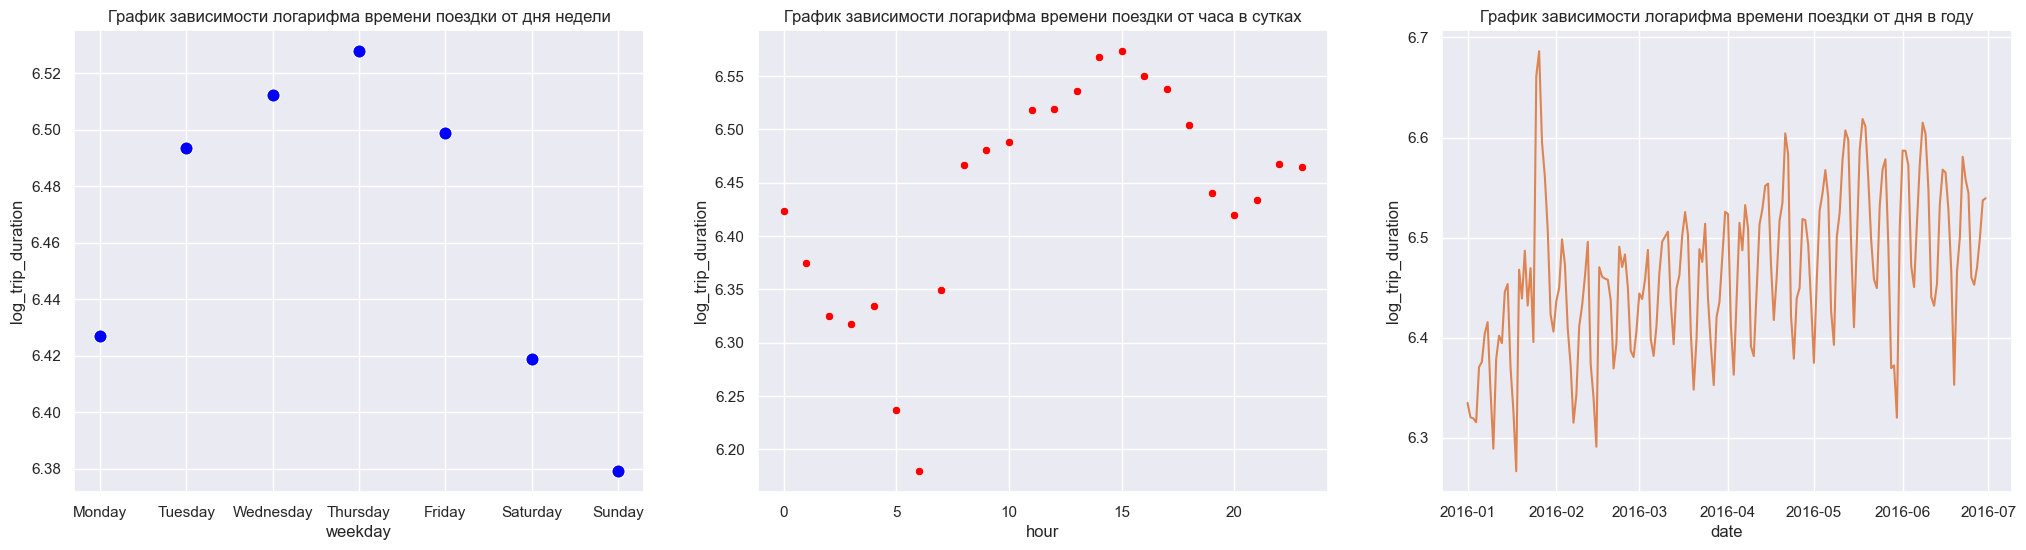

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.3)

######## Графики ########

f, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.scatterplot(X_train.groupby('weekday').agg({'log_trip_duration':'mean'}).reindex(index = 
                                                                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index(), 
                                                                                x = 'weekday', y='log_trip_duration', ax=axs[0], color='blue', s=90)

sns.scatterplot(X_train.groupby('hour').agg({'log_trip_duration':'mean'}).reset_index(), x='hour', y='log_trip_duration', ax=axs[1], color='red')

sns.lineplot(X_train.groupby('date').agg({'log_trip_duration':'mean'}).reset_index(), x='date', y='log_trip_duration', ax=axs[2], color='#DD8452')

axs[0].set_title('График зависимости логарифма времени поездки от дня недели')
axs[1].set_title('График зависимости логарифма времени поездки от часа в сутках')
axs[2].set_title('График зависимости логарифма времени поездки от дня в году');


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

#### <div style='color:red'> Ответ: </div>

- #### Да, графики для логарифма длительности поездки и графики количества поездок приблизительно совпадают, потому что эти 2 признаки положительно зависимы. Чем больше количество поездок, тем больше машин на дорогах, что приводит к повышенному трафику, а следовательно и к более длительному времени поездки

- #### В аномальный период в мае наблюдаются максимальные длительности поездок, что непосредственно связано с ограничением движения. В конце мая наблюдается аномально низкая длительность поездок из-за низкого спроса на услуги такси в период праздника (или же преобладание быстрых поездок на маленькие расстояния)

- #### Да, на графике зависимости логорифма длительности поездки от дня в году можно увидеть растущий тренд, что может быть связано с возвращением людей с отпусков (это было описано ранее), а следовательно и к более повышенному спросу на услуги такси 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [86]:
X_train['is_anomaly_1'] = ((X_train['date'] == pd.to_datetime('2016-01-23')) | (X_train['date'] == pd.to_datetime('2016-01-24'))) * 1
X_test['is_anomaly_1'] = ((X_test['date'] == pd.to_datetime('2016-01-23')) | (X_test['date'] == pd.to_datetime('2016-01-24'))) * 1

X_train['is_anomaly_2'] = ((X_train['date'] == pd.to_datetime('2016-05-30')) | (X_train['date'] == pd.to_datetime('2016-05-29'))) * 1
X_test['is_anomaly_2'] = ((X_test['date'] == pd.to_datetime('2016-05-30')) | (X_test['date'] == pd.to_datetime('2016-05-29'))) * 1

X_train['day_num'] = X_train.pickup_datetime.dt.day_of_year
X_test['day_num'] = X_test.pickup_datetime.dt.day_of_year

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

#### <div style='color:red'> Ответ: </div>

#### **день недели**, **месяц**, **час** - являются категориальными, потому что каждое значение признака может по-разному влиять на таргет, поэтому стоит ввести каждое значение этих переменных с разными весами. К тому же количество уникальных значений для этих переменных достаточно мало и вполне вероятно, что каждое уникальное значение признака будет влиятельной переменной (т.е. иметь ненулевой вес)

#### **Номер дня в году** - является численными, потому что кодирование этого признака будет создавать много признаков в модели, большинство из которых скорее всего окажется с околнулевыми весами 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [87]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

categorical = ['weekday', 'month', 'hour']
numeric = ['day_num'] 
other = ['is_anomaly_1', 'is_anomaly_2']

features = categorical + numeric + other


y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


RMSE: 0.7865486764522155


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [88]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)


    return m

In [89]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [90]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

#### <div style='color:red'> Ответ: </div> Можно заметить, что есть отличающиеся точки скопления, а именно _Johny F. Kennedy International Airport_ и _Newark Liberty Airport_. Они могут быть потенциально полезными, поскольку:

- #### Обычно в аэропортах большое скопление машин, что непосредственно добавляет времени к длительности поездки

- #### Пассажиры могут попросить таксиста помочь с разгрузкой багажа, таксист может заврешить поездку и после помощи

- #### Возможно, пассажир просит ехать таксиста настолько быстро, насколько это возможно

#### Аналогично можно рассмотреть вокзалы (_New York Penn Station_, _Grand Central Terminal_), для которых причины нетипичной длительности такие же, как и для аэропортов

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [91]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

X_train['haversine'] = haversine_array(X_train['pickup_latitude'].values, 
                                              X_train['pickup_longitude'].values, 
                                              X_train['dropoff_latitude'].values, 
                                              X_train['dropoff_longitude'].values)


X_test['haversine'] = haversine_array(X_test['pickup_latitude'].values, 
                                              X_test['pickup_longitude'].values, 
                                              X_test['dropoff_latitude'].values, 
                                              X_test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [92]:
X_train.loc[:, 'log_haversine'] = np.log1p(X_train.haversine)
X_test.loc[:, 'log_haversine'] = np.log1p(X_test.haversine)

numeric += ['log_haversine']

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [93]:
your_df = X_train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

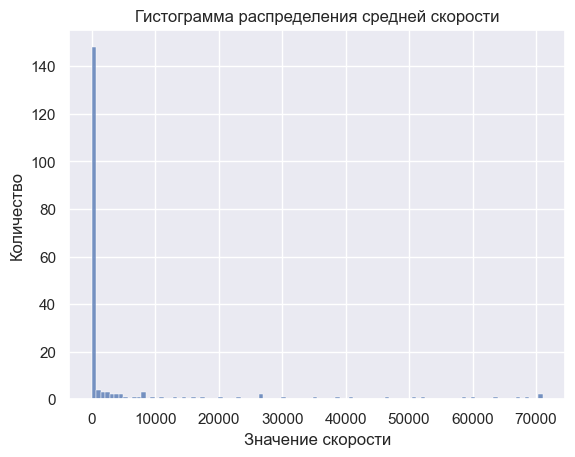

In [94]:
X_train['avg_speed'] = round(X_train['haversine'] / ((np.exp(X_train['log_trip_duration']) - 1) / 3600))

sns.histplot(X_train['avg_speed'].value_counts(), bins=100, common_bins=False)
plt.xlabel('Значение скорости')
plt.ylabel('Количество')
plt.title('Гистограмма распределения средней скорости');




Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

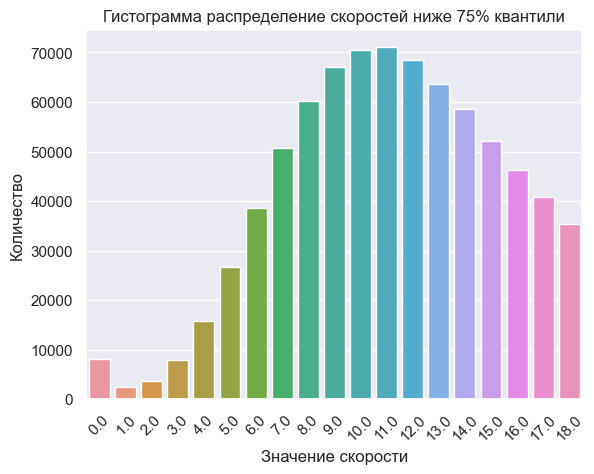

In [95]:
r_q = X_train['avg_speed'].quantile(0.75)

sns.countplot(X_train['avg_speed'][(X_train.avg_speed <= r_q)].reset_index(), x='avg_speed')
plt.xlabel('Значение скорости')
plt.ylabel('Количество')
plt.title('Гистограмма распределение скоростей ниже 75% квантили')
plt.xticks(rotation=45);

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

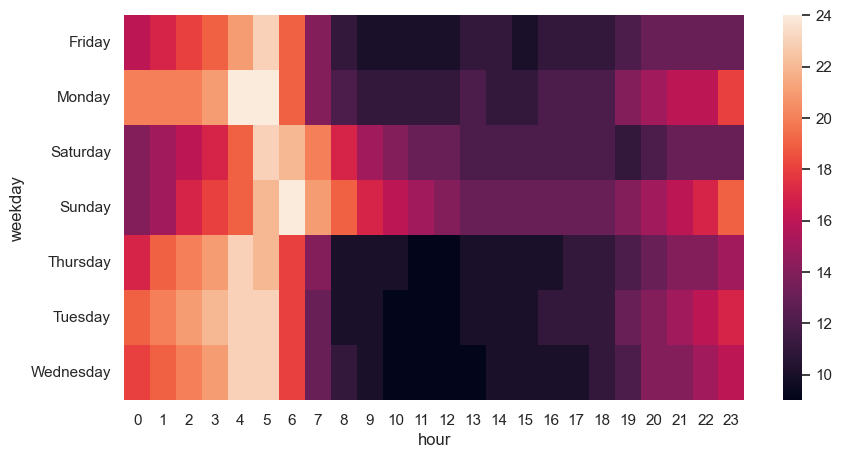

In [96]:
for_hm = pd.pivot_table(X_train.sort_values(['weekday', 'hour']).groupby(['weekday', 'hour']).agg({'avg_speed': np.median}).reset_index(), 
                        values='avg_speed', index='weekday', 
                        columns='hour')

plt.figure(figsize=(10,5))
sns.heatmap(for_hm);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

#### <div style='color:red'> Ответ: </div> Потому что этот признак получен с помощью таргета, а на тестовой выборке у нас не будет ни значения средней скорости, ни длителности поездки (таргета)


In [97]:
X_train.drop('avg_speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

#### <div style='color:red'> Ответ: </div> В промежутке с 0 до 6 средняя скорость максимальна, что может свидетельствовать об отсутсвии пробок в этот период. Следовательно период с 7 до 23 - период пробок

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [98]:
X_train['busy_traf'] = ((X_train['hour'] >= 0) & (X_train['hour'] <= 6)) * 1
X_train['empty_traf'] = ((X_train['hour'] >= 7) & (X_train['hour'] <= 23)) * 1

X_test['busy_traf'] = ((X_test['hour'] >= 0) & (X_test['hour'] <= 6)) * 1
X_test['empty_traf'] = ((X_test['hour'] >= 7) & (X_test['hour'] <= 23)) * 1

other += ['busy_traf', 'empty_traf']

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

#### <div style='color:red'> Ответ: </div> Потенциальная полезность признаков была описана в пункте, где определялись скопления точек

#### **Ссылки на сайты с координатами локаций:**

- #### [Penn Station](https://www.latlong.net/place/penn-station-new-york-ny-usa-3104.html#:~:text=The%20latitude%20of%20Penn%20Station%2C,and%20the%20longitude%20is%20-73.993584)

- #### [Grand Central Terminal](https://www.latlong.net/place/grand-central-terminal-new-york-city-ny-usa-26264.html#:~:text=The%20latitude%20of%20Grand%20Central,and%20the%20longitude%20is%20-73.977295)

- #### [Johny F. Kennedy International Airport](https://www.latlong.net/place/john-f-kennedy-international-airport-ny-usa-31506.html#:~:text=The%20latitude%20of%20John%20F.,and%2073°%2046'%2051.4848''%20W)

- #### [Newark Liberty Airport](https://www.latlong.net/place/newark-nj-usa-8638.html)

In [99]:
penn_station = (40.750580, -73.993584)
grand_terminal = (40.752655, -73.977295)
jk_airport = (40.641766, -73.780968)
newark = (40.735657, -74.172363)

radius = 0.005 ### Радиус, в рамках которого будет определяться принадлежность к особому месту

#############
### TRAIN ###
#############

### Penn Station ####

X_train.loc[((penn_station[0] - radius <= X_train['dropoff_latitude']) &
                (X_train['dropoff_latitude']<= penn_station[0] + radius) &
                    (penn_station[1] - radius <= X_train['dropoff_longitude']) &
                        (X_train['dropoff_longitude'] <= penn_station[1] + radius)), 'Spec_place_dropoff'] = 'Trainstation'

X_train.loc[((penn_station[0] - radius <= X_train['pickup_latitude']) &
                (X_train['pickup_latitude']<= penn_station[0] + radius) &
                    (penn_station[1] - radius <= X_train['pickup_longitude']) &
                        (X_train['pickup_longitude'] <= penn_station[1] + radius)), 'Spec_place_pickup'] = 'Trainstation'

### Grand Terminal ####

X_train.loc[((grand_terminal[0] - radius <= X_train['dropoff_latitude']) &
                (X_train['dropoff_latitude']<= grand_terminal[0] + radius) &
                    (grand_terminal[1] - radius <= X_train['dropoff_longitude']) &
                        (X_train['dropoff_longitude'] <= grand_terminal[1] + radius)), 'Spec_place_dropoff'] = 'Trainstation'

X_train.loc[((grand_terminal[0] - radius <= X_train['pickup_latitude']) &
                (X_train['pickup_latitude']<= grand_terminal[0] + radius) &
                    (grand_terminal[1] - radius <= X_train['pickup_longitude']) &
                        (X_train['pickup_longitude'] <= grand_terminal[1] + radius)), 'Spec_place_pickup'] = 'Trainstation'


### Kennedy Airport ####

X_train.loc[((jk_airport[0] - radius <= X_train['dropoff_latitude']) &
                (X_train['dropoff_latitude']<= jk_airport[0] + radius) &
                    (jk_airport[1] - radius <= X_train['dropoff_longitude']) &
                        (X_train['dropoff_longitude'] <= jk_airport[1] + radius)), 'Spec_place_dropoff'] = 'Airport'

X_train.loc[((jk_airport[0] - radius <= X_train['pickup_latitude']) &
                (X_train['pickup_latitude']<= jk_airport[0] + radius) &
                    (jk_airport[1] - radius <= X_train['pickup_longitude']) &
                        (X_train['pickup_longitude'] <= jk_airport[1] + radius)), 'Spec_place_pickup'] = 'Airport'


### Newark Airport ####

X_train.loc[((newark[0] - radius <= X_train['dropoff_latitude']) &
                (X_train['dropoff_latitude']<= newark[0] + radius) &
                    (newark[1] - radius <= X_train['dropoff_longitude']) &
                        (X_train['dropoff_longitude'] <= newark[1] + radius)), 'Spec_place_dropoff'] = 'Airport'

X_train.loc[((newark[0] - radius <= X_train['pickup_latitude']) &
                (X_train['pickup_latitude']<= newark[0] + radius) &
                    (newark[1] - radius <= X_train['pickup_longitude']) &
                        (X_train['pickup_longitude'] <= newark[1] + radius)), 'Spec_place_pickup'] = 'Airport'


X_train.Spec_place_pickup.fillna('Reg', inplace=True)
X_train.Spec_place_dropoff.fillna('Reg', inplace=True)




############
### TEST ###
############


X_test.loc[((penn_station[0] - radius <= X_test['dropoff_latitude']) &
                (X_test['dropoff_latitude']<= penn_station[0] + radius) &
                    (penn_station[1] - radius <= X_test['dropoff_longitude']) &
                        (X_test['dropoff_longitude'] <= penn_station[1] + radius)), 'Spec_place_dropoff'] = 'Trainstation'

X_test.loc[((penn_station[0] - radius <= X_test['pickup_latitude']) &
                (X_test['pickup_latitude']<= penn_station[0] + radius) &
                    (penn_station[1] - radius <= X_test['pickup_longitude']) &
                        (X_test['pickup_longitude'] <= penn_station[1] + radius)), 'Spec_place_pickup'] = 'Trainstation'

### Grand Terminal ####

X_test.loc[((grand_terminal[0] - radius <= X_test['dropoff_latitude']) &
                (X_test['dropoff_latitude']<= grand_terminal[0] + radius) &
                    (grand_terminal[1] - radius <= X_test['dropoff_longitude']) &
                        (X_test['dropoff_longitude'] <= grand_terminal[1] + radius)), 'Spec_place_dropoff'] = 'Trainstation'

X_test.loc[((grand_terminal[0] - radius <= X_test['pickup_latitude']) &
                (X_test['pickup_latitude']<= grand_terminal[0] + radius) &
                    (grand_terminal[1] - radius <= X_test['pickup_longitude']) &
                        (X_test['pickup_longitude'] <= grand_terminal[1] + radius)), 'Spec_place_pickup'] = 'Trainstation'


### Kennedy Airport ####

X_test.loc[((jk_airport[0] - radius <= X_test['dropoff_latitude']) &
                (X_test['dropoff_latitude']<= jk_airport[0] + radius) &
                    (jk_airport[1] - radius <= X_test['dropoff_longitude']) &
                        (X_test['dropoff_longitude'] <= jk_airport[1] + radius)), 'Spec_place_dropoff'] = 'Airport'

X_test.loc[((jk_airport[0] - radius <= X_test['pickup_latitude']) &
                (X_test['pickup_latitude']<= jk_airport[0] + radius) &
                    (jk_airport[1] - radius <= X_test['pickup_longitude']) &
                        (X_test['pickup_longitude'] <= jk_airport[1] + radius)), 'Spec_place_pickup'] = 'Airport'


### Newark Airport ####

X_test.loc[((newark[0] - radius <= X_test['dropoff_latitude']) &
                (X_test['dropoff_latitude']<= newark[0] + radius) &
                    (newark[1] - radius <= X_test['dropoff_longitude']) &
                        (X_test['dropoff_longitude'] <= newark[1] + radius)), 'Spec_place_dropoff'] = 'Airport'

X_test.loc[((newark[0] - radius <= X_test['pickup_latitude']) &
                (X_test['pickup_latitude']<= newark[0] + radius) &
                    (newark[1] - radius <= X_test['pickup_longitude']) &
                        (X_test['pickup_longitude'] <= newark[1] + radius)), 'Spec_place_pickup'] = 'Airport'

X_test.Spec_place_pickup.fillna('Reg', inplace=True)
X_test.Spec_place_dropoff.fillna('Reg', inplace=True)

categorical += ['Spec_place_pickup', 'Spec_place_dropoff']


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

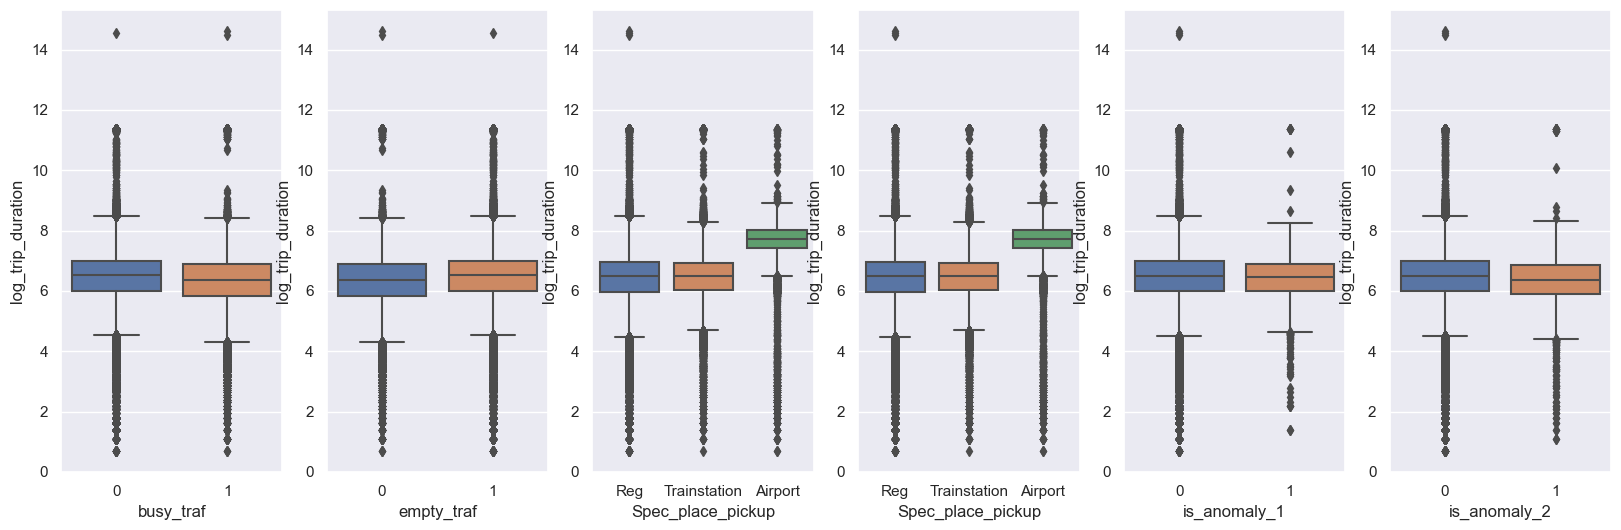

In [100]:
f, axs = plt.subplots(1, 6, figsize=(20, 6))


sns.boxplot(X_train, x='busy_traf', y = 'log_trip_duration', ax=axs[0])
sns.boxplot(X_train, x='empty_traf', y = 'log_trip_duration', ax=axs[1])

sns.boxplot(X_train, x='Spec_place_pickup', y='log_trip_duration', ax=axs[2])
sns.boxplot(X_train, x='Spec_place_pickup', y='log_trip_duration', ax=axs[3])

sns.boxplot(X_train, x='is_anomaly_1', y='log_trip_duration', ax=axs[4])
sns.boxplot(X_train, x='is_anomaly_2', y='log_trip_duration', ax=axs[5]);



**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

#### <div style='color:red'> Ответ: </div> Исходя из графиков можно сделать вывод, что все признаки в разной степени влияют на таргет, поэтому можно потенциально сказать, что признаки получились хорошими

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

> # _**Объяснение**_
>
>> ## **init**
>> #### Зададим параметры для прямоугольника, обрамляющего наибольшее количество точек. На вход будет приниматься количество строк и столбцов, а также высота и широта прямоугольника. По дефолту будут создаваться прямоугольник 4 x 3 с шириной 0.09 и высотой 0.1
>
>> ## **fit**
>> #### В **fit** мы будем передавать выборку, по которой будем считать середину прямоугольника, и названия столбцов, в которых находятся координаты точек. После расчета координат центра происходит расчет левого нижнего и верхнего правого углов необходимых для построения прямоугольника. Параллельно с построением прямоугольника происходит расчет координатов точек пересечения прямых, в дальнейшем это понадобится для классификации области, в которой началась или закончилась поездка. Также в **fit** происходит построение нескольких точек (по дефолту 1000 точек) откуда началась или началась поездка
>
>> ## **transform**
>> #### В **transform** передаются точки, для которых необходимо определить номер ячейки, в котором находится точка. Для этого создается матрица размером количество строк x количество столбцов: $$ nums = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ 10 & 11 & 12 \end{pmatrix} \text{, для дефолтных значений} $$ После создается дубликаты векторов с координатами точек пересечения прямых, но центральные элементы дублируются, т.е.: $$ arr_1 = \begin{pmatrix} x_1, & x_2, & x_2, & ... &, \ x_{k-1}, & x_{k-1}, & x_{k} \end{pmatrix} \text{, где k - количество столбцов прямоуголника} $$ $$ arr_2 = \begin{pmatrix} y_1 \\ y_2 \\ y_2 \\ ... \\ y_{l-1} \\  y_{l-1} \\ y_{l} \end{pmatrix} \text{, где l - количество строк прямоуголника} $$ И создаем матрицу из дубликатов этих векторов: $$ \text{x matrix} = \begin{pmatrix} x_1 & x_2 & x_2 & ... & x_{k-1} & x_{k-1} & x_{k} \\  & & & \ldots \\ x_1 & x_2 & x_2 & ... & x_{k-1} & x_{k-1} & x_{k} \end{pmatrix} $$ $$ \text{y matrix} = \begin{pmatrix} y_1 & & y_1 \\ y_2 & & y_2 \\ y_2 & & y_2 \\ ... & \ldots \\ y_{l-1} & &  y_{l-1} \\ y_{l-1} & & y_{l-1} \\ y_{l} & & y_{l} \end{pmatrix} $$ Далее инициализируем функцию **idx** где будем классифицировать к какому сектору относится каждая точка следующим образом (для примера возьмем точку, которая лежит в 10 секторе):
>> - #### Поэлементо сравниваем значение координаты $ x $ заданной точки со значениями из $ \text{x matrix} $, например, для точки из примера должна получиться следующая матрица: $$ mat_1 = \begin{pmatrix} True & False & ... & False & False \\ True & False & ... & False & False \\ & & ... & & \\ True & False & ... & False & False \end{pmatrix} $$
>> - #### Аналогично для значение координаты $ y $, но тут наоборот будем выбирать ту область в $ y matrix$, в которую это координата не входит. Для нашего примера матрица выглядит следующим образом: $$ mat_2 = \begin{pmatrix} True & ... & True \\ & ... & \\ True & ... & True \\ False & ... & False \end{pmatrix} $$
>> - #### Также введем 2 матрицы $ check_1 $ и $ check_2 $, которые будут определять, находится ли точка внутри прямоугольника. Матрицы должны получиться следующими: $$ check_1 = check_2 = \begin{pmatrix} True & ... & True \\ & ... & \\ True & ... & True \end{pmatrix} $$ 
>> - #### Перемножаем все матрицы поэлементно и суммируем элементы по блокам, чтобы в итоге получилась матрица размером количество строк x количество столбцов, где в каждом элементе будет количество True в каждом блоке. Должна получиться следующая матрица: $$ rez = \begin{pmatrix} 2 & 0 & 0 \\ 2 & 0 & 0 \\ 2 & 0 & 0 \\ 1 & 0 & 0  \\ 0 & 0 & 0  \end{pmatrix} $$
>> - #### На последнем этапе ищем максимальный индекс колонки и столбца (т.е. самый правый и самый нижний ненулевой элемент матрицы) и возвращаем элемент из матрицы $ nums $ (матрица с номерами секторов) элемент с соответствующими индексами. Однако может получиться нулевая матрица, что означает, что точка не входит в область прямоугольника $ \Rightarrow $ возвращаем значение -1



In [101]:
from sklearn.base import BaseEstimator, TransformerMixin

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, columns = 3, rows=4, wdth = 0.09, hght = 0.1):
    
        self.columns = columns
        self.rows = rows
        self.wdth = wdth
        self.hght = hght
    
        self.m = folium.Map()
    
    def show_map(self):

        return self.m

    def fit(self, X=None, latitude='latitude', longitude='longitude', y=None):

        #######################################
        #### Расчет координат вершин сетки ####
        #######################################

        center = (X[latitude].mean(), X[longitude].mean())

        lft_corner = (center[0] - 0.5*self.hght, center[1] - 0.5*self.wdth)

        rght_corner = (center[0] + 0.5*self.hght, center[1] + 0.5*self.wdth)

        self.m = folium.Map(location=center)

        ###############################
        #### Генерация строк сетки ####
        ###############################

        hgth_step = (rght_corner[0] - lft_corner[0]) / self.rows

        draw_cords_rows = (lft_corner[0], rght_corner[1])

        for i in range(self.rows):

            draw_cords_rows = (draw_cords_rows[0] + hgth_step, rght_corner[1]) 

            folium.Rectangle([lft_corner, draw_cords_rows], color='red').add_to(self.m)


        ##################################
        #### Генерация столбцов сетки ####
        ##################################

        wdth_step = (rght_corner[1] - lft_corner[1]) / self.columns

        draw_cords_columns = (rght_corner[0], lft_corner[1] - wdth_step)


        for i in range(self.columns + 1):

            draw_cords_columns = (rght_corner[0], draw_cords_columns[1] + wdth_step)

            folium.Rectangle([lft_corner, draw_cords_columns], color='red').add_to(self.m)

        ###########################
        #### Отображение точек ####
        ###########################

        for _, row in X.sample(1000).iterrows():
            folium.Circle(
                radius=100,
                location=(row[latitude], row[longitude]),
                color='blue',
                fill_color='blue',
                fill=True
            ).add_to(self.m)

        ############################################
        #####                                  #####
        #### Генерация точек пересечения прямых ####
        #####                                  #####
        ############################################


        self.y_cords = np.arange(lft_corner[0], lft_corner[0] + (self.rows + 1)* hgth_step, hgth_step)
        self.x_cords = np.arange(lft_corner[1], lft_corner[1] + (self.columns + 2)* wdth_step, wdth_step)[:-1]

        
        ### Создание кругов в центре каждого сектора ###

        filter = np.array([0.5, 0.5])

        self.circle_y = np.convolve(self.x_cords, filter, mode='valid')
        self.circle_x = np.convolve(self.y_cords, filter, mode='valid')

        for x in self.circle_y:
            for y in self.circle_x:

                folium.Circle(
                radius=500,
                location=(y, x),
                color='red',
                fill_color='red',
                fill=True,
                fill_opacity=1
            ).add_to(self.m)

        return self
    
    def get_points(self):

        return [self.circle_x, self.circle_y]

    def idx(self, point):


        a = self.x_matrix <= point[1]

        b = self.y_matrix >= point[0]

        check_1 = self.x_matrix.min() <= point[1] <= self.x_matrix.max()
        check_2 = self.y_matrix.min() <= point[0] <= self.y_matrix.max()

        rez = a * b * check_1 * check_2

        rez = rez.reshape(4, 2, 3, 2).sum(axis=(1,3))

        if not rez.any():

            return -1
        
        idxx = np.nonzero(rez)

        col = np.max(idxx[1]) 
        row = np.max(idxx[0]) 

        return self.nums[row, col]



    def transform(self, X=None, latitiude=None, longitude=None, y=None):

        pnts = np.array(X[[latitiude, longitude]])

        ### Индексы секторов ###
        self.nums = np.arange(1, self.rows * self.columns + 1).reshape(self.rows, self.columns)

        ##############################################################
        ### Создание матрицы с координатами вершин каждого сектора ###
        ##############################################################

        arr_1 = np.repeat(self.x_cords[1:-1], 2)
        arr_1 = np.concatenate(([self.x_cords[0]], arr_1, [self.x_cords[-1]]))

        arr_2 = np.repeat(self.y_cords[1:-1], 2)
        arr_2 = np.concatenate(([self.y_cords[0]], arr_2, [self.y_cords[-1]]))


        self.x_matrix = np.tile(arr_1, (len(arr_2), 1))
        self.y_matrix = np.tile(arr_2[::-1], (len(arr_1), 1)).T

        rez = np.apply_along_axis(self.idx, 1, pnts)

        return rez

df_perm_1 = X_train[['pickup_longitude', 'pickup_latitude']].rename(columns={'pickup_latitude': 'latitude', 'pickup_longitude': 'longitude'})
df_perm_2 = X_train[['dropoff_longitude', 'dropoff_latitude']].rename(columns={'dropoff_latitude':'latitude', 'dropoff_longitude' : 'longitude'})

X_train_cords = pd.concat([df_perm_1, df_perm_2]) ### Необходимо, чтобы применить fit как для pickup, так и для dropoff

transformer = MapGridTransformer()
transformer.fit(X_train_cords)

for_pickup_train = transformer.transform(X_train, 'pickup_latitude', 'pickup_longitude')
for_dropoff_train = transformer.transform(X_train, 'dropoff_latitude', 'dropoff_longitude')

for_pickup_test = transformer.transform(X_test, 'pickup_latitude', 'pickup_longitude')
for_dropoff_test = transformer.transform(X_test, 'dropoff_latitude', 'dropoff_longitude')

transformer.show_map()

In [102]:
X_train['point_start'] = for_pickup_train
X_train['point_end'] = for_dropoff_train

X_test['point_start'] = for_pickup_test
X_test['point_end'] = for_dropoff_test

categorical += ['point_start', 'point_end']

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [103]:
features = categorical + numeric + other

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47955960417175075


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

#### <div style='color:red'>Ответ: </div> 

- #### **vendor_id** - id может быть полезен, потому что разные вендоры могут использовать более продвинутые средства в сравнении с клиентами: более качественные машины, более опытные водители и тд. Таким образом использование более продвинутых ресурсов может значительно уменьшить длительность поездки

- #### **passenger_count** - если в такси пассажиров, то может произойти случай, когда таксисит выбирает неоптимальный маршрут до точки назначения, т.к. некоторым пассажирам необходимо выйти в той или определенной точки по пути (или же нет) к конечной точке

- #### **store_and_fwd_flag** - вполне вероятно, что из-за отсутствия подключения к серверу данные по начальной и конечной точке некорректно сохранились, что непосредственно скажется на качестве модели 

In [104]:
print(f'{df.vendor_id.nunique()} - кол-во уникальных значений vendor_id')
print(f'{df.passenger_count.nunique()} - кол-во уникальных значений passenger_count')
print(f'{df.store_and_fwd_flag.nunique()} - кол-во уникальных значений store_and_fwd_flag')

2 - кол-во уникальных значений vendor_id
10 - кол-во уникальных значений passenger_count
2 - кол-во уникальных значений store_and_fwd_flag


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

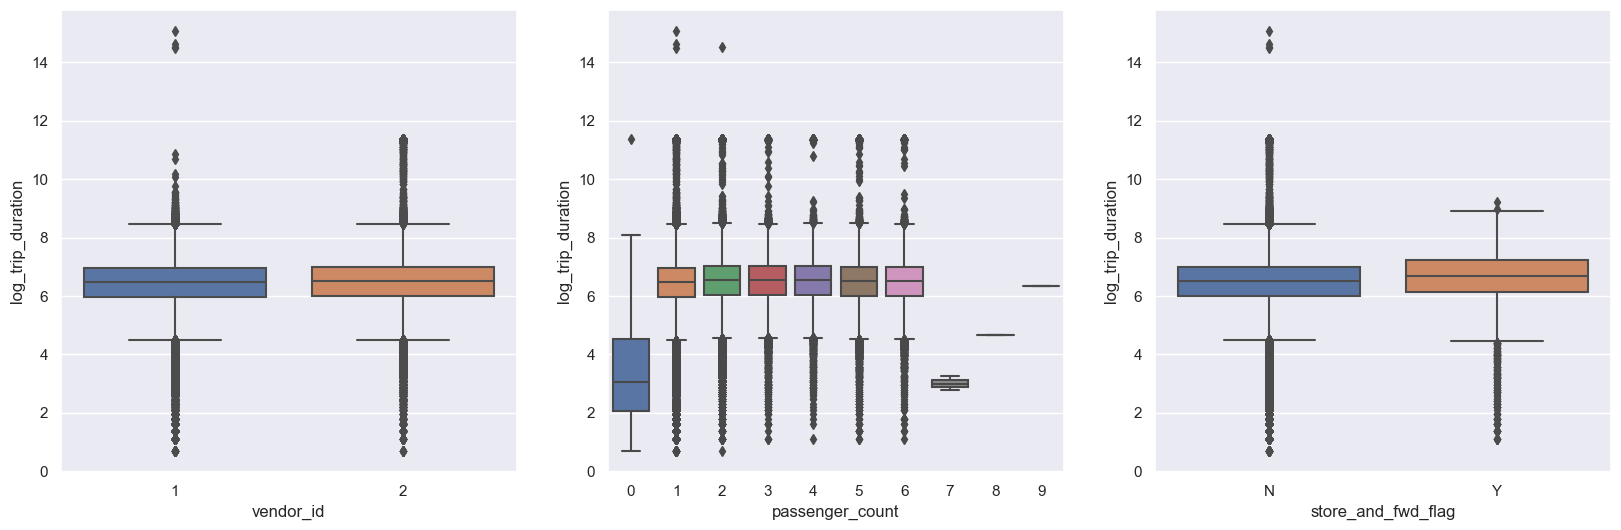

In [105]:
f, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(df, x='vendor_id', y = 'log_trip_duration', ax=axs[0])
sns.boxplot(df, x='passenger_count', y = 'log_trip_duration', ax=axs[1])
sns.boxplot(df, x='store_and_fwd_flag', y = 'log_trip_duration', ax=axs[2]);

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [106]:
X_train.loc[(X_train.vendor_id == 1), 'vendor_id'] = 0
X_train.loc[(X_train.vendor_id == 2), 'vendor_id'] = 1

X_train.loc[(X_train.store_and_fwd_flag == 'N'), 'store_and_fwd_flag'] = 0
X_train.loc[(X_train.store_and_fwd_flag == 'Y'), 'store_and_fwd_flag'] = 1

####

X_test.loc[(X_test.vendor_id == 1), 'vendor_id'] = 0
X_test.loc[(X_test.vendor_id == 2), 'vendor_id'] = 1

X_test.loc[(X_test.store_and_fwd_flag == 'N'), 'store_and_fwd_flag'] = 0
X_test.loc[(X_test.store_and_fwd_flag == 'Y'), 'store_and_fwd_flag'] = 1


other += ['vendor_id', 'store_and_fwd_flag']
numeric += ['passenger_count']


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

#### <div style='color:red'> Ответ: </div> Признаки <code>vendor_id</code> и <code>store_and_fwd_flag</code> практически никак не влияют на таргет, поэтому можно предположить, что оне не дадут сильное улучшение моделт, однако <code>passenger_count</code> потенциально сильный признак, посколько графики для каждого количества пассажиров отличаются и имеют разные параметры 

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [107]:
features = categorical + numeric + other

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47937626058118415


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

#### Посчитаем остатки регрессии

In [108]:
model = pipeline.fit(X_train_1, y_train)
y_pred = model.predict(X_train_1)

X_train['errors'] = abs(y_train - y_pred)

#### Построим гистограммы

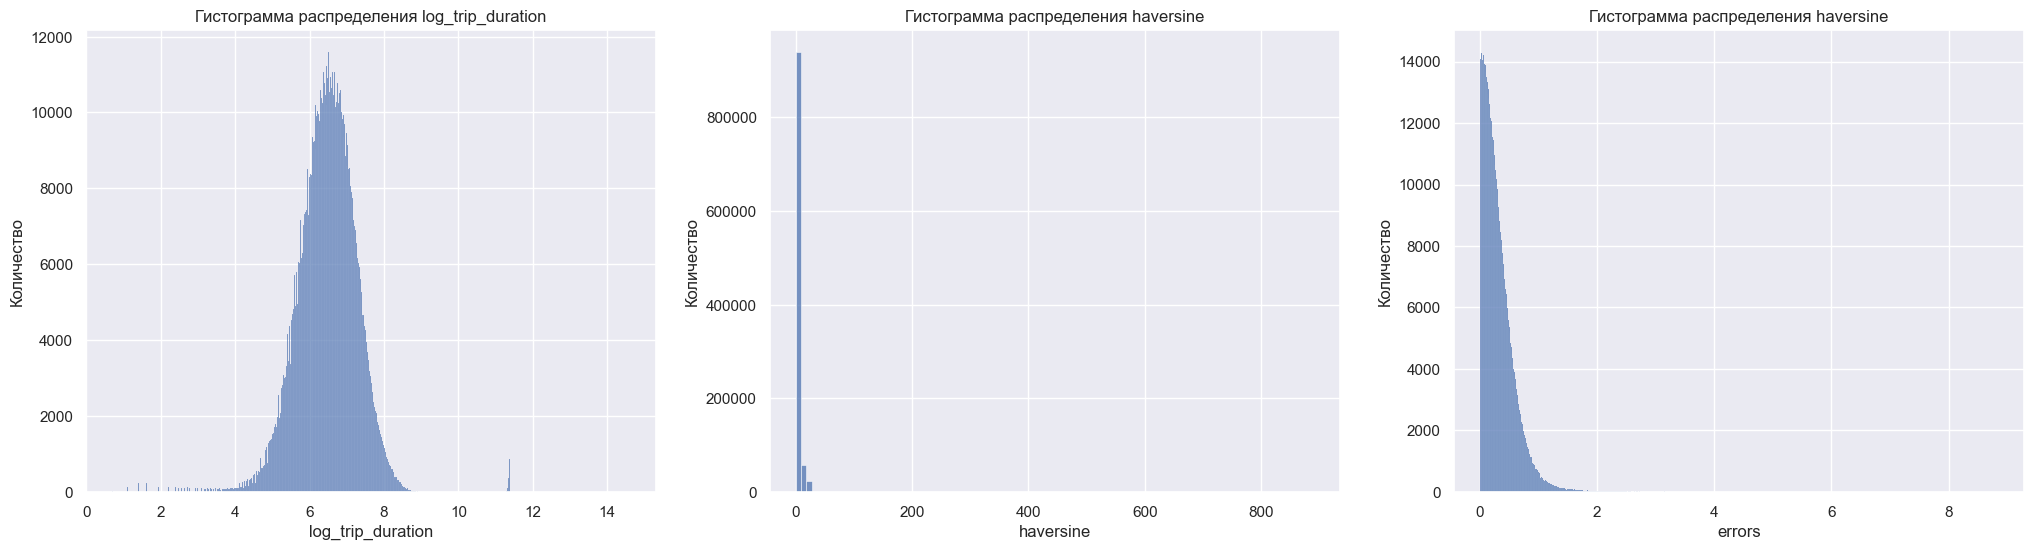

In [109]:
f, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(X_train.log_trip_duration, ax=axs[0])
sns.histplot(X_train.haversine, ax=axs[1], bins=100)
sns.histplot(X_train.errors, ax=axs[2])

axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма распределения log_trip_duration')
axs[1].set_ylabel('Количество')
axs[1].set_title('Гистограмма распределения haversine')
axs[2].set_ylabel('Количество')
axs[2].set_title('Гистограмма распределения haversine');

#### Расчитаем для каждого из нарисованного распределения квантили 25% (чтобы отсечь слишком маленьке значения) и 75% (чтобы отсеять слишком большие значения) и нарисуем эти границу на графиках в приближении

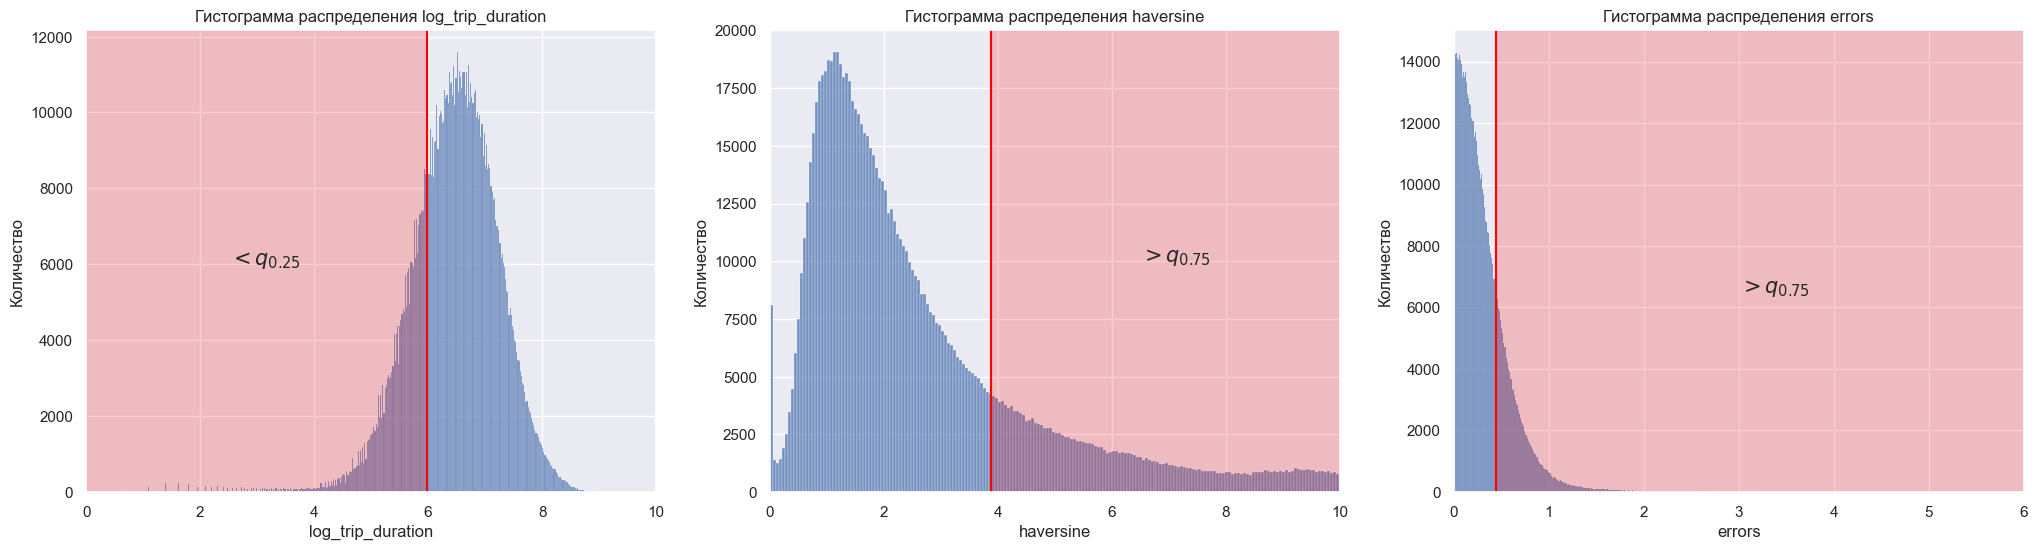

In [110]:
f, axs = plt.subplots(1, 3, figsize=(25, 6))

### Логарифм длительности поездки ###

qnt_log_trip = X_train.log_trip_duration.quantile(0.25)

axs[0].set_xlim(0, 10)
sns.histplot(X_train.log_trip_duration, ax=axs[0])
axs[0].axvline(qnt_log_trip, color='red')
axs[0].axvspan(0, qnt_log_trip, color='red', alpha=0.2)
axs[0].text(2.5, 6000, r'$ < q_{0.25}$', fontsize=15)
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма распределения log_trip_duration');


### Haversine ###

qnt_haversine = X_train.haversine.quantile(0.75)

axs[1].set_xlim(0, 10)
sns.histplot(X_train.haversine, ax=axs[1])
axs[1].axvline(qnt_haversine, color='red')
axs[1].axvspan(qnt_haversine, 10,color='red', alpha=0.2)
axs[1].text(6.5, 10000, r'$ > q_{0.75}$', fontsize=15)
axs[1].set_ylabel('Количество')
axs[1].set_title('Гистограмма распределения haversine');



### Ошибки регрессии ###

qnt_errors = X_train.errors.quantile(0.75)

axs[2].set_xlim(0, 6)
sns.histplot(X_train.errors, ax=axs[2])
axs[2].axvline(qnt_errors, color='red')
axs[2].axvspan(qnt_errors, 6, color='red', alpha=0.2)
axs[2].text(3, 6500, r'$ > q_{0.75}$', fontsize=15)
axs[2].set_ylabel('Количество')
axs[2].set_title('Гистограмма распределения errors');



In [111]:
X_train = X_train[(X_train.log_trip_duration >= qnt_log_trip) &
                      (X_train.haversine <= qnt_haversine) & 
                      (X_train.errors <= qnt_errors)]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [112]:
categorical

['weekday',
 'month',
 'hour',
 'Spec_place_pickup',
 'Spec_place_dropoff',
 'point_start',
 'point_end']

- #### Для категории <code>Spec_place_dropoff</code>

In [113]:
X_train.Spec_place_dropoff.value_counts() / X_train.shape[0]

Spec_place_dropoff
Reg             0.875137
Trainstation    0.124860
Airport         0.000003
Name: count, dtype: float64

Можно объеденить Airport и Trainstation и переделать признак <code>Spec_place_dropoff</code> в бинарный (является ли конечная точка особенным местом)

In [114]:
X_train.loc[(X_train.Spec_place_dropoff == 'Airport') | (X_train.Spec_place_dropoff == 'Trainstation'), 'Spec_place_dropoff'] = 1
X_train.loc[X_train.Spec_place_dropoff == 'Reg', 'Spec_place_dropoff'] = 0

X_test.loc[(X_test.Spec_place_dropoff == 'Airport') | (X_test.Spec_place_dropoff == 'Trainstation'), 'Spec_place_dropoff'] = 1
X_test.loc[X_test.Spec_place_dropoff == 'Reg', 'Spec_place_dropoff'] = 0

categorical.remove('Spec_place_dropoff')
other += ['Spec_place_dropoff']

- #### Для категории <code>Spec_place_pickup</code>

In [115]:
X_train.Spec_place_pickup.value_counts() / X_train.shape[0]

Spec_place_pickup
Reg             0.874459
Trainstation    0.125266
Airport         0.000275
Name: count, dtype: float64

Аналогично переделаем <code>Spec_place_pickup</code> в бинарный признак

In [116]:
X_train.loc[(X_train.Spec_place_pickup == 'Airport') | (X_train.Spec_place_pickup == 'Trainstation'), 'Spec_place_pickup'] = 1
X_train.loc[X_train.Spec_place_pickup == 'Reg', 'Spec_place_pickup'] = 0

X_test.loc[(X_test.Spec_place_pickup == 'Airport') | (X_test.Spec_place_pickup == 'Trainstation'), 'Spec_place_pickup'] = 1
X_test.loc[X_test.Spec_place_pickup == 'Reg', 'Spec_place_pickup'] = 0

categorical.remove('Spec_place_pickup')
other += ['Spec_place_pickup']

- #### Для категории <code>weekday</code>

In [117]:
X_train.weekday.value_counts() / X_train.shape[0]

weekday
Friday       0.160364
Thursday     0.158204
Wednesday    0.151584
Saturday     0.146346
Tuesday      0.144930
Monday       0.124157
Sunday       0.114414
Name: count, dtype: float64

Все категории сбалансированы 

- #### Для категории <code>month</code>

In [118]:
X_train.month.value_counts() / X_train.shape[0]

month
March       0.176512
April       0.173468
May         0.169096
February    0.164025
June        0.162294
January     0.154605
Name: count, dtype: float64

Все категории сбалансированы

- #### Для категории <code>hour</code>

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [119]:
features = categorical + numeric + other

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


RMSE: 0.4984201131316352


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [120]:
print(f'{len(features)} - кол-во признаков до OneHotEncoding')

column_transformer_1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
], remainder='passthrough')

pipeline_1 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_1),
])

model = pipeline_1.fit(X_train_1)

cat_new = column_transformer_1.named_transformers_['ohe'].get_feature_names_out().shape[0]

print(f'{cat_new + len(other) + len(numeric)} - кол-во признаков после OneHotEncoding')

16 - кол-во признаков до OneHotEncoding
74 - кол-во признаков после OneHotEncoding


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [121]:
from sklearn.linear_model import Lasso

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]


pipeline_Lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])


model = pipeline_Lasso.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.793592454250976


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [122]:
X_train_1, X_val = train_test_split(X_train, test_size=0.2)

y_train_1 = X_train_1['log_trip_duration']
X_train_1 = X_train_1[features]

y_val = X_val['log_trip_duration']
X_val = X_val[features]

alphas = np.logspace(-1, 0.001, 30)

#### Оптимальное значение alpha для Ridge-регрессии 

In [123]:
best_alpha_ridge = 0
best_rmse = 0

for alpha in alphas:

    pipeline_Ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=alpha))
    ])

    model_ridge = pipeline_Ridge.fit(X_train_1, y_train_1)
    y_pred_ridge = model_ridge.predict(X_val)
    rmse_ridge = mean_squared_error(y_val, y_pred_ridge, squared=False)

    if rmse_ridge > best_rmse:

        best_rmse = rmse_ridge
        best_alpha_ridge = alpha

print(f'Оптимальное значение alpha для Ridge-регресии:{best_alpha_ridge}')
print(f'RMSE: {best_rmse}')

Оптимальное значение alpha для Ridge-регресии:0.17442980274018788
RMSE: 0.20359743032715164


#### Оптимальное значение alpha для Lasso-регресии

In [124]:
best_alpha_lasso = 0
best_rmse = 0

for alpha in alphas:

    pipeline_Lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=alpha))
    ])

    model_lasso = pipeline_Lasso.fit(X_train_1, y_train_1)
    y_pred_lasso = model_lasso.predict(X_val)
    rmse_lasso = mean_squared_error(y_val, y_pred_lasso, squared=False)

    if rmse_lasso > best_rmse:

        best_rmse = rmse_lasso
        best_alpha_lasso = alpha

print(f'Оптимальное значение alpha для Lasso-регресии:{best_alpha_lasso}')
print(f'RMSE: {best_rmse}')

Оптимальное значение alpha для Lasso-регресии:0.18885910664962596
RMSE: 0.30983287957693156


#### Получилось, что Ridge-регрессия показала лучший результат. Поэтому измерим ее качество на тестовой выборке

In [125]:
pipeline_Ridge_best = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=best_alpha_ridge))
    ])

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline_Ridge_best.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.49841872254772907


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

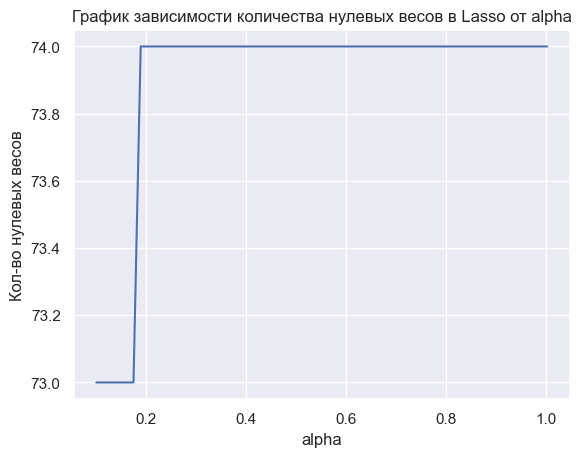

In [126]:
def count_zero_weights(alpha):

    global X_train_1, column_transformer

    pipeline_Lasso = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])

    model_Lasso = pipeline_Lasso.fit(X_train_1, y_train)
    zero_weights = sum(model_Lasso.named_steps['regression'].coef_ == 0)

    return zero_weights

cnt_zero_wght = np.vectorize(count_zero_weights)
zeros = cnt_zero_wght(alphas)

plt.plot(alphas, zeros)

plt.title('График зависимости количества нулевых весов в Lasso от alpha')
plt.xlabel('alpha')
plt.ylabel('Кол-во нулевых весов');

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [127]:
top_routes = X_train.groupby(['point_start', 'point_end']).agg({'id':'count'}).reset_index().sort_values('id', ascending=False).head(100)
top_routes['rang'] = top_routes.id.rank()

X_train = X_train.merge(top_routes.drop('id', axis=1), on=['point_start', 'point_end'], how='left')
X_test = X_test.merge(top_routes.drop('id', axis=1), on=['point_start', 'point_end'], how='left')

X_train.rang.fillna(-1, inplace=True)
X_test.rang.fillna(-1, inplace=True)

categorical += ['rang']


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [128]:
pipeline_Ridge_best = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=best_alpha_ridge))
    ])

features = categorical + numeric + other

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline_Ridge_best.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.4943183519025434


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

#### <div style='color:red'>Ответ: </div> [Манхэттенское расстояние](https://computervision.fandom.com/wiki/Manhattan_distance#:~:text=Манхэттенское%20расстояние%20также%20известно%20как,нет%203%2C14%20-%20й%20авеню) - также известно как расстояние до городского квартала. Он назван так потому, что это расстояние, которое проехал бы автомобиль в городе, выложенном квадратными кварталами, как Манхэттен. Потенциально это может быть полезно, потому что оно более точно описывает траекторию движения автомобилей конкретно в нашей задаче, чем евклидово расстояние

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

># __**Объяснение**__
>
>#### Зададим для начала обычную ось координат, не параллельную улицам в Нью-Йорке
>
>#### Далее определим координаты начала и конца одной из улиц. Для примера возьмем West 57 Street. Координаты будем определять с помощью этого [сайта](https://coordinates-converter.com/en/decimal/40.763617,-73.975571?karte=OpenStreetMap&zoom=17)
>
>#### Зададим матрицу с координатами точек, которые образуют ось $ Y $, но только поменяем $ x $ и $ y $ местами в силу нашей задачи 
>
>#### $$ O_y = \begin{pmatrix} y_1 & x_1 \\ y_2 & x_2 \end{pmatrix} $$
>
>#### Нам необходимо сделать так, чтобы прямая, построенная по координатам West 57 Street, была перпендикулярна синей прямой. Поэтому найдем угол между синей прямой и West 57 Street по формуле: $$ \angle (\text{Ось координат}, \text{West 57 Street}) = arctan(k_2)$$, где $ k_2 $ - угол наклона прямой, образованной координатами West 57 Street
>
>#### После чего переведем полученный угол из радиан в градусы с помощью <code>np.degrees</code>. Запишем получившийся угол в переменную $ \theta $
>
>#### Зададим матрицу поворота, причем поменяем местами столбцы, потому что для нашей задачи координаты задаются как $ (y, x) $: 
>
>#### $$ \text{povorot} = \begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{pmatrix} $$
>
>#### Чтобы повернуть вертикальную линию, заданную координатами $ O_y $, вокруг своей оси, для начала необходимо ее центрировать:
>
>#### $$ O_y^{center} = \begin{pmatrix} y_1 & x_1 \\ y_2 & x_2 \end{pmatrix} - \begin{pmatrix} \overline{y} & \overline{x} \\ \overline{y} & \overline{x} \end{pmatrix} $$
>
>#### Теперь чтобы повернуть ось, надо умножить матрицу $ O_y^{center} $ на матрицу $ \text{povorot} $, после чего сложить с матрицой с усредненными координатами
>
>#### $$ O_y^{rotated} = (O_y^{center} * povorot) + \begin{pmatrix} \overline{y} & \overline{x} \\ \overline{y} & \overline{x} \end{pmatrix} $$
>
>#### Чтобы повернуть горизонтальную ось на такое же количество градусов, чтобы она оставалась перпендикулярной горизонтальной оси, надо произвести все те же действия, только из $ \theta $ вычесть 90 градусов и транспонировать матрицу $ \text{povorot} $


In [129]:
class ManhattanDistance():

    def __init__(self, x_size=0.05, y_size=0.05):

        self.x_size = x_size
        self.y_size = y_size

        self.m = folium.Map()
        self.theta = None

    def add_dot(self, X=None, lat='latitude', long='longitude', color='blue'):

        point = X[[lat, long]].values[0]


        folium.Circle(
                radius=500,
                location=(point[0], point[1]),
                color=color,
                fill_color=color,
                fill=True
            ).add_to(self.m)


    def show_map(self):

        return self.m
    
    def get_angle_rotate(self):

        return self.theta

    def fit(self, X=None, longitude='longitude', latitude='latitude'):

        center = (X[latitude].mean(), X[longitude].mean())



        self.m = folium.Map(location=center)

        # folium.Circle(
        #         radius=500,
        #         location=center,
        #         color='red',
        #         fill_color='red',
        #         fill=True
        #     ).add_to(self.m)
        
        o_X = np.array([
            [center[0], center[1] - self.x_size], 
               [center[0], center[1] + self.x_size]
        ])

        o_Y = np.array([
            [center[0] - self.y_size, center[1]], 
               [center[0] + self.y_size, center[1]]
        ])

        folium.PolyLine(o_X, color='red').add_to(self.m)
        folium.PolyLine(o_Y, color='red').add_to(self.m)


        west_57_street = [(40.7655104,-73.9800345) , (40.7643238,-73.9771951)]


        x_1 = o_Y[0][1]
        x_2 = o_Y[1][1]

        y_1 = o_Y[0][0]
        y_2 = o_Y[1][0]

        x_3 = west_57_street[0][1]
        x_4 = west_57_street[1][1]

        y_3 = west_57_street[0][0]
        y_4 = west_57_street[1][0]

        k_2 = (y_4 - y_3)/(x_4 - x_3)



        self.theta = np.degrees(np.arctan(k_2)) + 0.038

        povorot = np.array([
                [np.cos(self.theta), -np.sin(self.theta)],
                [np.sin(self.theta), np.cos(self.theta)]

        ])

        matrix = np.array([
                [y_1, x_1],
                [y_2, x_2]

        ])

        matrix_2 = np.array([
                [o_X[0][0], o_X[0][1]],
                [o_X[1][0], o_X[1][1]]
            

        ])

        new_line = np.dot(matrix - matrix.mean(axis=0), povorot) + matrix.mean(axis=0)

        theta = self.theta - 90 - 0.038

        povorot = np.array([
                [np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]
        ])


        new_line_2 = np.dot(matrix_2 - matrix_2.mean(axis=0), povorot.T) + matrix_2.mean(axis=0)

        folium.PolyLine(new_line, color='blue').add_to(self.m)
        folium.PolyLine(new_line_2, color='blue').add_to(self.m)

manhatt = ManhattanDistance()
manhatt.fit(X_train_cords)
manhatt.show_map()



#### Однако стоит учесть, что при повороте осей координатной плоскости значения манхэттенского расстояния тоже должны измениться. Для расчета координат точек в новой координатной плоскости используем следующую формулу: $$ \text{Пусть } (x_{center}, y_{center}) \text{ - координаты центра} $$ $$ \text{Тогда } \Delta{x} = x - x_{center}, \ \Delta{y} = y - y_{center}$$ $$ x' = \Delta{x} cos(\theta) - \Delta{y} sin(\theta) + x_{center} $$ $$ y' = \Delta{x} sin(\theta) + \Delta{y} cos(\theta) + y_{center}$$ $$ Где \ \theta \text{ - угол поворота в радианах} $$

In [130]:
center = (40.75134838809615, -73.97345908516027)

def new_coordinates(y1, x1, y2, x2):

    global center

    angle = np.radians(manhatt.get_angle_rotate())

    delta_x1 = x1 - center[1]
    delta_x2 = x2 - center[1]

    delta_y1 = y1 - center[0]
    delta_y2 = y2 - center[0]

    new_x1 = delta_x1 * np.cos(angle) - delta_y1 * np.sin(angle) + center[1]
    new_y1 = delta_x1 * np.sin(angle) + delta_y1 * np.cos(angle) + center[0]

    new_x2 = delta_x2 * np.cos(angle) + delta_y2 * np.sin(angle) + center[1]
    new_y2 = delta_x2 * np.sin(angle) + delta_y2 * np.cos(angle) + center[0]

    updated_manhattan = np.log1p(abs(new_x2 - new_x1) + abs(new_y1 - new_y2))

    return updated_manhattan


X_train['Manhattan'] = new_coordinates(X_train.dropoff_latitude, X_train.dropoff_longitude, X_train.pickup_latitude, X_train.pickup_longitude)
X_test['Manhattan'] = new_coordinates(X_test.dropoff_latitude, X_test.dropoff_longitude, X_test.pickup_latitude, X_test.pickup_longitude)

numeric += ['Manhattan']

Код для самопроверки

In [131]:
# a = X_train.sample(1, random_state=42)
# angle = np.radians(manhatt.get_angle_rotate())
# a['new_long'] = (a.pickup_longitude - center[1]) * np.cos(angle) - (a.pickup_latitude - center[0]) * np.sin(angle) + center[1]
# a['new_lat'] = (a.pickup_longitude - center[1]) * np.sin(angle) + (a.pickup_latitude - center[0]) * np.cos(angle) + center[0]

# manhatt.add_dot(a, 'pickup_latitude', 'pickup_longitude', 'red')
# manhatt.add_dot(a, 'new_lat', 'new_long', 'blue')
# manhatt.show_map()

In [132]:
print(f'{X_train.Manhattan.corr(X_train.log_trip_duration)} - корреляция между log_trip_duration и Manhattan')
print(f'{X_train.log_haversine[X_train.log_haversine != -np.inf].corr(X_train.log_trip_duration)} - корреляция между log_trip_duration и log_haversine')

0.20824118770641897 - корреляция между log_trip_duration и Manhattan
0.5952100974914434 - корреляция между log_trip_duration и log_haversine


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [133]:
features = numeric + other + categorical

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]

model = pipeline_Ridge_best.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)

print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.4959665006027918


In [134]:
np.corrcoef(X_train['log_haversine'], X_train['Manhattan'])

array([[1.        , 0.51519319],
       [0.51519319, 1.        ]])

#### <div style='color:red'>Ответ: </div> 

#### Качество модели ухудшилось из-за того, что признаки <code>Manhattan</code> и <code>log_haversine</code> имеют значительную линейную взаимосвязь, что действительно негативно влияет на результат

#### Попробуем удалить признак <code>log_haversine</code> и посмотрим на качество модели

In [135]:
numeric.remove('log_haversine')
features = numeric + other + categorical

y_train = X_train['log_trip_duration']
y_test = X_test['log_trip_duration']

X_train_1 = X_train[features]
X_test_1 = X_test[features]


model = pipeline_Ridge_best.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)

print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

numeric.append('log_haversine')
numeric.remove('Manhattan')

RMSE: 0.6520260988314253


#### Исходя из результатов можно сделать вывод, что признак <code>Manhattan</code> ухудшает качество модели и не следует учитывать его как признак

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [136]:
import h3

class Hexagon():

    def __init__(self, rez = 7, radius = 20):

        self.rez = rez
        self.radius = radius

        self.m = folium.Map()


    def get_index(self, point):

        h3_index = h3.geo_to_h3(point[0], point[1], self.rez)

        if h3_index in self.hexagons:

            return h3_index
        
        else:

            return 'Not in area'

    def fit(self, X=None, latitude='latitude', longitude='longitude'):


        center = (X[latitude].mean(), X[longitude].mean())

        self.m = folium.Map(location=center)

        self.hexagons = h3.k_ring(h3.geo_to_h3(center[0], center[1], self.rez), self.radius)
   

        for hexagon in self.hexagons:
            hex_boundary = h3.h3_to_geo_boundary(hexagon)
            folium.Polygon(locations=hex_boundary, color='red').add_to(self.m)


        train_points = X[[latitude, longitude]].values

        train_sector_counts, counts = np.unique(np.apply_along_axis(self.get_index, 1, train_points), return_counts=True)

        self.df = pd.DataFrame({'id_area': train_sector_counts, 'count': counts})


        return self
    
      
    def transform(self, X=None,latitude='latitude', longitude='longitude', sample_size=1, color='blue'):

        pnts = np.array(X[[latitude, longitude]])

        for _, row in X.sample(sample_size).iterrows():
            folium.Circle(
                radius=100,
                location=(row[latitude], row[longitude]),
                color=color,
                fill_color=color,
                fill=True
            ).add_to(self.m)
        
       
        area_index = np.apply_along_axis(self.get_index, 1, pnts)

        self.return_counters = pd.DataFrame({'ID': X.id.values,'id_area': area_index}).merge(self.df, on='id_area')


        return self.return_counters
    

    def check_dots(self, X=None, pick_lat='pickup_latatiude', pick_long='pickup_longitude', drop_lat='dropoff_latitude', drop_long='dropoff_longitude'):

        fromm = np.array(X[[pick_lat, pick_long]])

        too = np.array(X[[drop_lat, drop_long]])

        for i in range(len(fromm)):

            folium.Circle(
                radius=200,
                location=(fromm[i][0], fromm[i][1]),
                color='green',
                fill_color='green',
                fill=True,
                fill_opacity=1
            ).add_to(self.m)


            folium.Circle(
                radius=200,
                location=(too[i][0], too[i][1]),
                color='black',
                fill_color='black',
                fill=True,
                fill_opacity=1
                
            ).add_to(self.m)

            aline=folium.PolyLine(locations=[fromm[i], too[i]],weight=2,color = 'blue')
            self.m.add_children(aline)


    def show_map(self):

        return self.m
    
hexx = Hexagon()
hexx.fit(X = X_train_cords)

# train_pick = hexx.transform(X_train, 'pickup_latitude', 'pickup_longitude', 1000, 'blue')
# train_drop = hexx.transform(X_train, 'dropoff_latitude', 'dropoff_longitude', 1000, 'red')

# test_pick = hexx.transform(X_test, 'pickup_latitude', 'pickup_longitude', 1000, 'blue')
# test_drop = hexx.transform(X_test, 'dropoff_latitude', 'dropoff_longitude', 1000, 'purple')

# testing = X_test[X_test.id.isin(['id1595322', 'id1367238', 'id1162751', 'id2970624', 'id0116107'])]
# hexx.check_dots(testing, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


hexx.show_map()

    

#### Подбор оптимальных параметров сетки

In [140]:
from IPython.display import clear_output

target_rmse = 0.49433861748584135
best_diff = 0
best_rez = None
best_rad = None

categorical += ['id_area_x', 'id_area_y']
numeric += ['count_x', 'count_y']

for rezz in np.arange(5, 15, 1):
    for radd in np.arange(1,25, 1):

        hexx = Hexagon(rez = rezz, radius=radd)
        hexx.fit(X = X_train_cords)

        train_pick = hexx.transform(X_train, 'pickup_latitude', 'pickup_longitude', 1000, 'blue')
        train_drop = hexx.transform(X_train, 'dropoff_latitude', 'dropoff_longitude', 1000, 'red')

        test_pick = hexx.transform(X_test, 'pickup_latitude', 'pickup_longitude', 1000, 'blue')
        test_drop = hexx.transform(X_test, 'dropoff_latitude', 'dropoff_longitude', 1000, 'purple')

        X_train_ = X_train.copy()
        X_test_ = X_test.copy()

        X_train_ = pd.merge(X_train_, train_pick, how='left', left_on='id', right_on='ID')
        X_train_ = pd.merge(X_train_, train_drop, how='left', left_on='id', right_on='ID')

        X_test_ = pd.merge(X_test_, test_pick, how='left', left_on='id', right_on='ID')
        X_test_ = pd.merge(X_test_, test_drop, how='left', left_on='id', right_on='ID')

        X_test_.id_area_x.fillna('-1', inplace=True)
        X_test_.id_area_y.fillna('-1', inplace=True)
        X_test_.count_x.fillna(0, inplace=True)
        X_test_.count_y.fillna(0, inplace=True)


        X_train_.id_area_x.fillna('-1', inplace=True)
        X_train_.id_area_y.fillna('-1', inplace=True)
        X_train_.count_x.fillna(0, inplace=True)
        X_train_.count_y.fillna(0, inplace=True)


        

        X_train_.drop(['ID_x', 'ID_y'], axis=1, inplace=True)
        X_test_.drop(['ID_x', 'ID_y'], axis=1, inplace=True)

        features = categorical + numeric + other

        y_train = X_train_['log_trip_duration']
        y_test = X_test_['log_trip_duration']

        X_train_1 = X_train_[features]
        X_test_1 = X_test_[features]

        model = pipeline_Ridge_best.fit(X_train_1, y_train)
        y_pred = model.predict(X_test_1)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        if target_rmse - rmse > best_diff:

            best_diff = target_rmse - rmse
            best_rez = rezz
            best_rad = radd

        clear_output(wait=True)
        print(rezz, radd)
        print(f'Текущая разница: {target_rmse - rmse}')
        print('---------------')
        print('Лучшие параметры')
        print('---------------')
        print(best_rez, best_rad)
        print(best_diff, '\n')
        print(f'0.5 балла: {best_diff >= 0.005}')
        print(f'1 балл: {best_diff >= 0.005 * 2}')
        print(f'1.5 балла: {best_diff >= 0.005 * 3}')
        print(f'2 балла: {best_diff >= 0.005 * 4}', '\n')

14 24
Текущая разница: 5.26050295278635e-05
---------------
Лучшие параметры
---------------
8 16
0.005915095639604739 

0.5 балла: True
1 балл: False
1.5 балла: False
2 балла: False 



## Использование ChatGPT

#### **Задание 9**: ChatGPT помогал с построением полигона, а конкретно как построить рамки на карте 

#### **Задание 17**: Использовал, чтобы получше разобраться с библиотекой h3, поскольку в интернете не очень много примеров, на которые я мог ориентироваться. Конкретно ChatGPT помог с разбиением карты на шестиугольники и какой параметр за что отвечает

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.